In [2]:
library(lubridate)
library(data.table)
library(dplyr)
library(Polychrome)
library(ggplot2)

In [3]:
datetimediff = function(t){
    t = sapply(strsplit(t, ", "), "[", 2)
    #tt = as.Date(t, format='%d %b %Y %H:%M:%S')
    tt = as.POSIXct(t,format='%d %b %Y %H:%M:%S')
    tt = sapply(tt, function(d) as.numeric(difftime(d , tt[1],units = 'mins'))  )
    return(tt)
}

In [4]:
header = c("RetweetCount", "UserId", "ScreenName", "FollowerCount", "DistanceFromRoot", "Time", "ParentScreenName", "Text")
data = read.table('./data/RetweetDataAOAS/retweet_data/Source_followers_tweet_0031_CNET.txt',sep = '\t',col.names = header)

data$TimeDiff = datetimediff(data$Time)
data$Time = NULL
data$Text = NULL
data

Warning message in file(file, "rt"):
"cannot open file './data/RetweetDataAOAS/retweet_data/Source_followers_tweet_0031_CNET.txt': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [14]:
header = c("RetweetCount", "UserId", "ScreenName", "FollowerCount", "DistanceFromRoot", "Time", "ParentScreenName", "Text")
file_list <- list.files(path="../data/retweet_data/",full.names = T)
dataset = data.frame()
counter = 1
all.data = list()
for (f in file_list){
    d = read.table(f,sep = '\t',col.names = header,header=FALSE, quote="")
    d$TimeDiff = datetimediff(d$Time)
    d$Time = NULL
    d$Text = NULL
    d$response = NA
    d$response[1] = tail(d$RetweetCount,n=1)
    d$TimeRatio = d$TimeDiff/tail(d$TimeDiff,n=1)
    d$RetweetRatio = d$RetweetCount/tail(d$RetweetCount,n=1)
    d$case = counter
    counter = counter + 1
    dataset <- rbindlist(list(dataset, d), use.names = T)
}
C52 = createPalette(52,  c("#ff0000", "#00ff00", "#0000ff"))
dataset$color = rep(C52, times=c(table(dataset$case)))

In [18]:
#ds = dataset
head(dataset)
dim(dataset)

RetweetCount,UserId,ScreenName,FollowerCount,DistanceFromRoot,ParentScreenName,TimeDiff,response,TimeRatio,RetweetRatio,case,color
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
0,158426909,Lawrence,87039,0,Lawrence,0.000000,21,0.000000000,0.00000000,1,#FD0022
1,38998962,lancejgosnell,367,1,Lawrence,0.400000,NA,0.001152959,0.04761905,1,#FD0022
2,377745103,EleanorWhitel,444,1,Lawrence,0.500000,NA,0.001441199,0.09523810,1,#FD0022
3,193070651,twitnjackie,42,1,Lawrence,2.066667,NA,0.005956956,0.14285714,1,#FD0022
4,61341105,theblkpanther52,235,1,Lawrence,2.183333,NA,0.006293236,0.19047619,1,#FD0022
5,15594535,JaynePR,898,1,Lawrence,2.516667,NA,0.007254035,0.23809524,1,#FD0022


[1] 12248    12

In [36]:
# Modeel input
model_input = list(M=na.omit(dataset$response), S = dataset$TimeDiff, f = dataset$FollowerCount, d=dataset$DistanceFromRoot, X=52, N=nrow(dataset), J = na.omit(dataset$response)+1,
                  JCUM = cumsum(na.omit(dataset$response)+1))
saveRDS(model_input, '../data/model_input.rds')

In [174]:
#dataset %>% group_by(case) %>% 
#    plot(RetweetRatio~TimeRatio,data=.,type='l',col=color)
#abline(h=.8,v=.4)

In [58]:
dataset %>% filter(case==2) %>% select(TimeDiff)  -> o
length(o$TimeDiff / tail(o$TimeDiff,n=1))
length(o$TimeDiff)

[1] 23

[1] 23

In [102]:
#dataset %>% filter(case==2)  %>% plot((RetweetCount/tail(TimeDiff,n=1))~(TimeDiff)/tail(TimeDiff,n=1), data=., type='l')
dataset %>% group_by(case) %>% mutate(TimeRatio = TimeDiff/tail(TimeDiff,n=1), RetweetRatio = RetweetCount/tail(RetweetCount,n=1),Color=C52)

ERROR: Error: Problem with `mutate()` input `Color`.
[31mx[39m Input `Color` can't be recycled to size 11.
[34mi[39m Input `Color` is `C52`.
[34mi[39m Input `Color` must be size 11 or 1, not 8777.
[34mi[39m The error occurred in group 1: case = 1.


In [104]:


# create your own color palette based on `seedcolors`

#swatch(P36)
C52

NC1       NC2       NC3       NC4       NC5       NC6       NC7       NC8 
"#F50D16" "#0DF80D" "#1616FC" "#FAD1D6" "#FC0DE2" "#00D1FD" "#F1E716" "#169156" 
      NC9      NC10      NC11      NC12      NC13      NC14      NC15      NC16 
"#A30D4B" "#5C3B86" "#F89400" "#8B6900" "#FD9FF7" "#C816FE" "#1CFBE6" "#555853" 
     NC17      NC18      NC19      NC20      NC21      NC22      NC23      NC24 
"#DAEAA7" "#7E9AFE" "#FB007D" "#CACBFD" "#00FCA2" "#80C300" "#D54522" "#F6998C" 
     NC25      NC26      NC27      NC28      NC29      NC30      NC31      NC32 
"#901C73" "#A2D0C7" "#FD45B4" "#267C94" "#A90DB5" "#773B3D" "#FFD47F" "#FB88BD" 
     NC33      NC34      NC35      NC36      NC37      NC38      NC39      NC40 
"#AA7CA3" "#6016BC" "#6E8622" "#CA8AFF" "#9DF5BB" "#A34000" "#A2A081" "#D53DB6" 
     NC41      NC42      NC43      NC44      NC45      NC46      NC47      NC48 
"#2265A9" "#FF5F85" "#87F0FE" "#267D6E" "#BD8A78" "#00C635" "#F256FF" "#984FFB" 
     NC49      NC50      NC51      NC52 
"#B0AA16" "#CE883B" "#9198AD" "#FECEFB"

In [117]:
color

ERROR: Error in eval(expr, envir, enclos): object 'color' not found


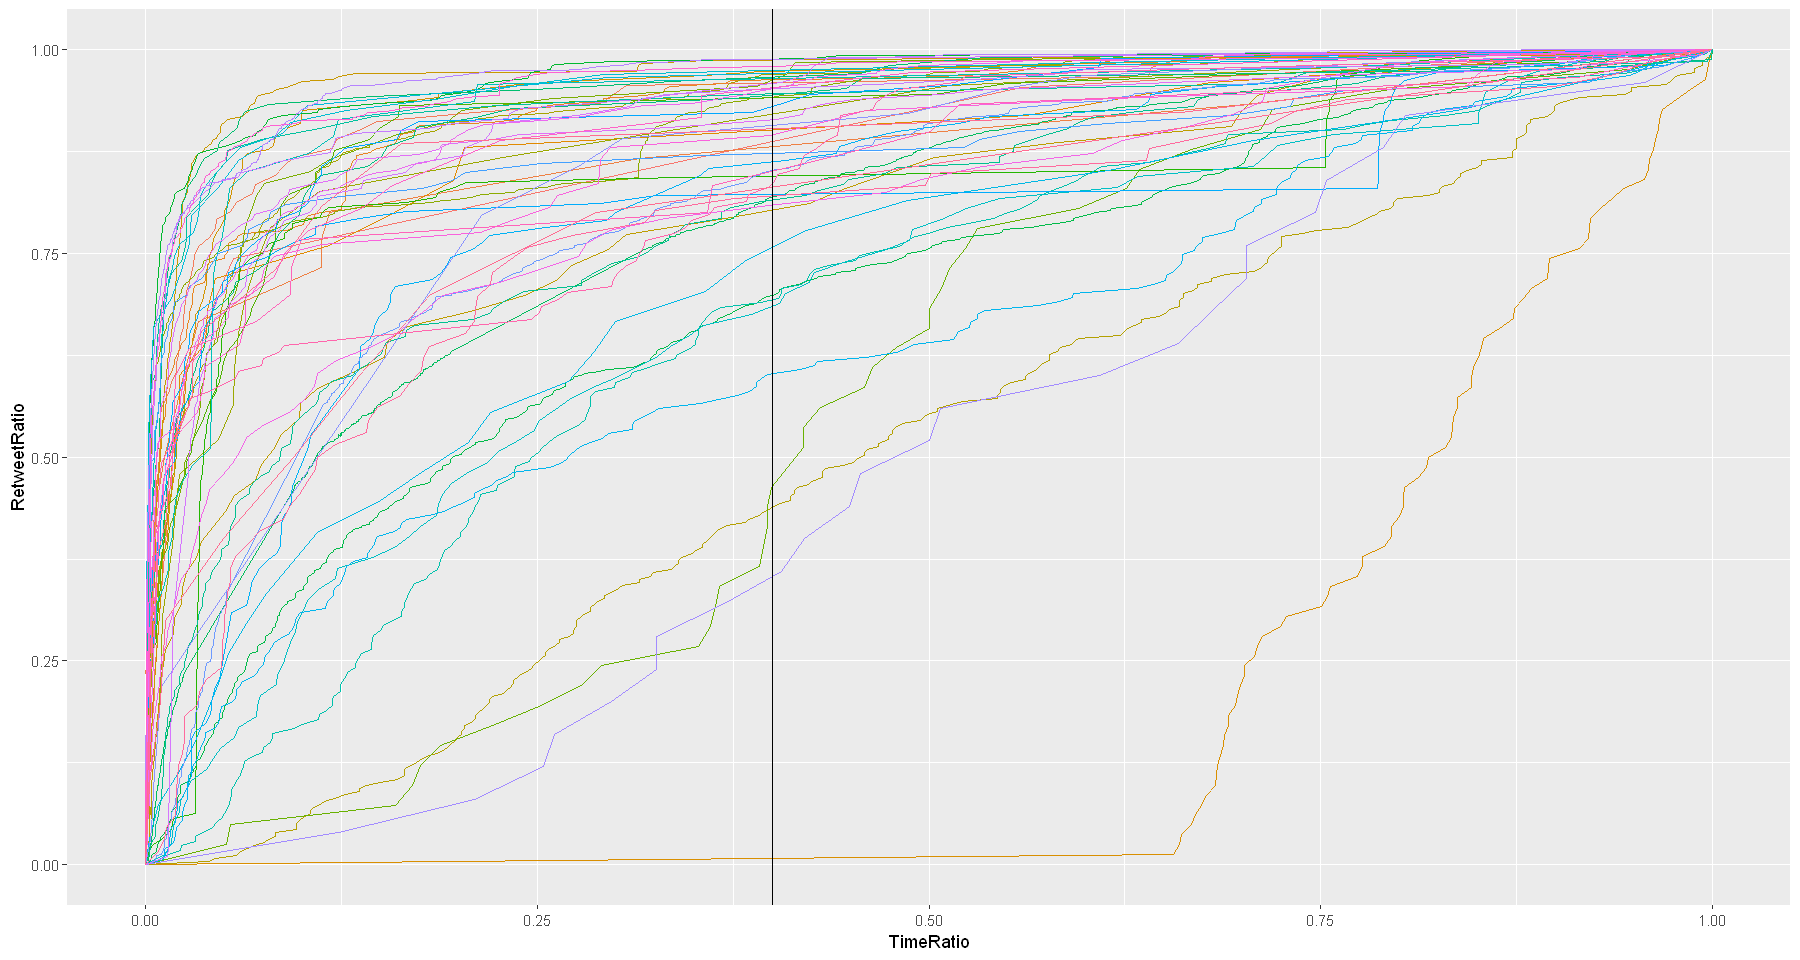

In [175]:
options(repr.plot.width=15, repr.plot.height=8)
dataset %>% group_by(case) %>% 
    mutate(TimeRatio = TimeDiff/tail(TimeDiff,n=1), RetweetRatio = RetweetCount/tail(RetweetCount,n=1)) %>% 
    ggplot(aes(y= RetweetRatio, x=TimeRatio,col=color)) +
    geom_line() +
    theme(legend.position = "none") +
    geom_vline(xintercept = .4)



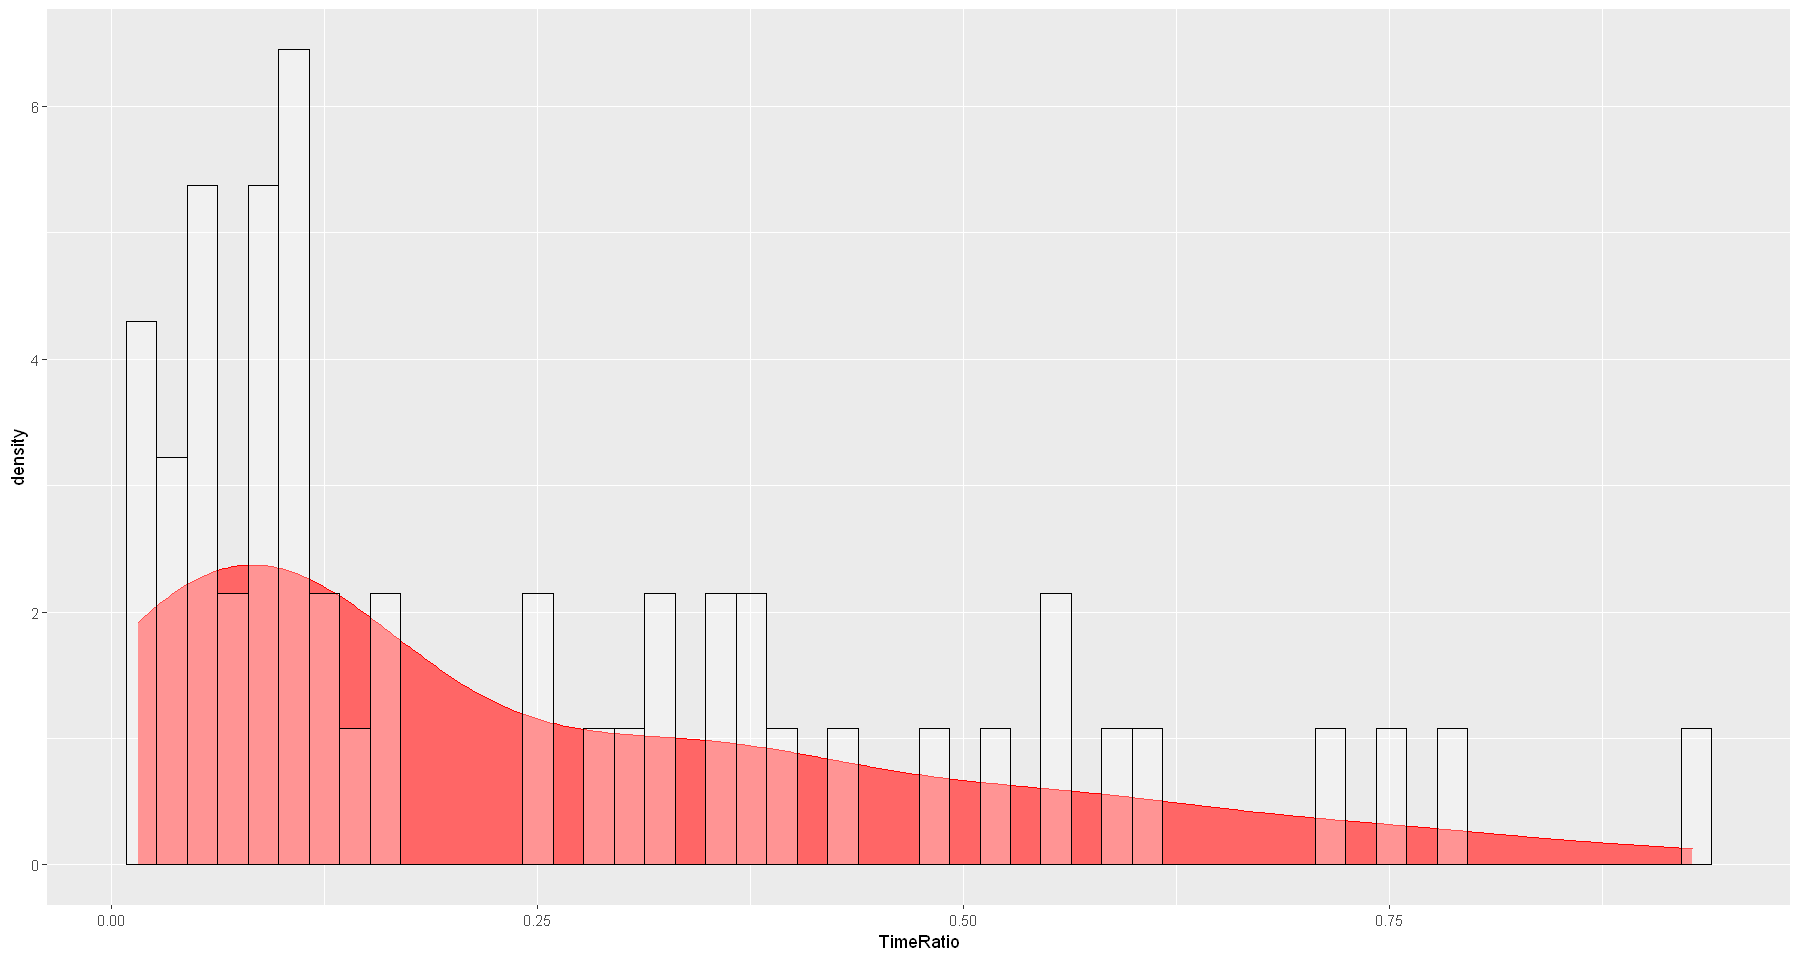

In [206]:
dataset %>% filter(RetweetRatio>=.8) %>% group_by(case) %>% filter(row_number()==1) %>% 
    ggplot(aes(x=TimeRatio)) +
    geom_density(color='red',fill="#FF6666") +
    geom_histogram(aes(y=..density..),bins=52,alpha=.3, position="identity",colour="black", fill="white")

[1] "#F50D16"

In [49]:
t[1]

[1] "13 Apr 2012 00:45:12 +0000"

In [59]:
tt2 = as.POSIXct(t,format='%d %b %Y %H:%M:%S')

In [75]:
as.numeric(difftime(tt2[11] , tt2[1],units = 'mins')) 

[1] 224.3

In [135]:
rainbow(4, start = 0.35, end = 0.6)

[1] "#00FF19" "#00FF99" "#00E6FF" "#0066FF"

In [136]:
 rainbow(4, start = 0, end = 0.25)[z]

ERROR: Error in eval(expr, envir, enclos): object 'z' not found
